# App dataset with decision trees

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
import random
random.seed(0)

In [2]:
app_dataset = pd.DataFrame({
    'Gender': ['Female','Female','Male','Female','Male','Male'],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})
app_dataset

,Gender,Age,App
0,Female,15,Atom Count
1,Female,25,Check Mate Mate
2,Male,32,Beehive Finder
3,Female,35,Check Mate Mate
4,Male,12,Atom Count
5,Male,14,Atom Count


# With age as a categorical feature

In [3]:
app_dataset_one_hot = pd.DataFrame(
    {'Gender_Female':[1,1,0,1,0,0],
     'Gender_Male':[0,0,1,0,1,1],
     'Age_Young':[1,0,0,0,1,1],
     'Age_Old':[0,1,1,1,0,0],
     'App_Atom_Count':[1,0,0,0,1,1],
     'App_Beehive_Finder':[0,0,1,0,0,0],
     'App_Check_Mate_Mate':[0,1,0,1,0,0]})
app_dataset_one_hot

,Gender_Female,Gender_Male,Age_Young,Age_Old,App_Atom_Count,App_Beehive_Finder,App_Check_Mate_Mate
0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0
5,0,1,1,0,1,0,0


In [4]:
X = app_dataset_one_hot[['Gender_Female','Gender_Male','Age_Old','Age_Young']]
y = app_dataset_one_hot[['App_Atom_Count','App_Beehive_Finder','App_Check_Mate_Mate']]

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)
dt.score(X,y)

1.0

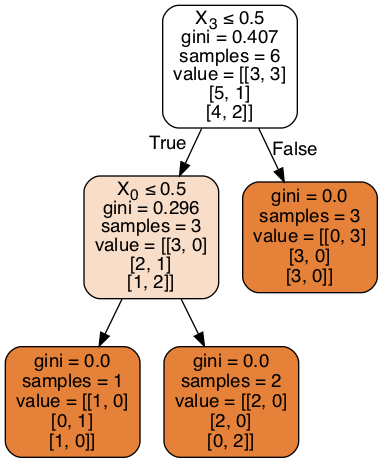

In [6]:
utils.display_tree(dt)

# With age as a numerical feature

In [7]:
app_dataset = pd.DataFrame({
    'Gender_Female':[1,1,0,1,0,0],
    'Gender_Male':[0,0,1,0,1,1],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})
print(app_dataset)

   Gender_Female  Gender_Male  Age              App
0              1            0   15       Atom Count
1              1            0   25  Check Mate Mate
2              0            1   32   Beehive Finder
3              1            0   35  Check Mate Mate
4              0            1   12       Atom Count
5              0            1   14       Atom Count


In [8]:
features = app_dataset[['Age','Gender_Female','Gender_Male']]
print(features)

   Age  Gender_Female  Gender_Male
0   15              1            0
1   25              1            0
2   32              0            1
3   35              1            0
4   12              0            1
5   14              0            1


In [9]:
labels = app_dataset['App']
print(labels)

0         Atom Count
1    Check Mate Mate
2     Beehive Finder
3    Check Mate Mate
4         Atom Count
5         Atom Count
Name: App, dtype: object


In [10]:
app_model = DecisionTreeClassifier()
app_model.fit(features, labels)
app_model.score(features, labels)

1.0

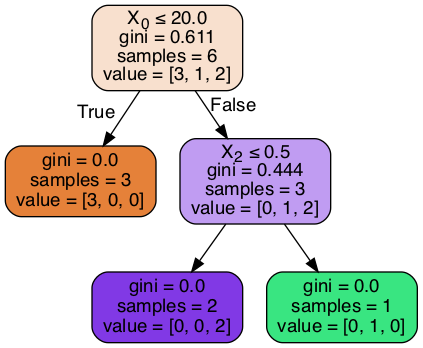

In [11]:
utils.display_tree(app_model)